In [2]:
import torch 
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from API_utils.dataset_api import API_Class

You have imported API Package!


c:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [11]:
DATASET_PATH = "Z:/mlpcnnsemi/dataset/64train_dataset.csv"
TEST_DATASET_PATH = "Z:/mlpcnnsemi/dataset/64test_dataset.csv"
SAVE_MODEL_PATH = "Z:/mlpcnnsemi/model/cnn/64"
DEVICE= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCH = 100
lr=0.0001

In [12]:
train_data = API_Class(DATASET_PATH)
test_data = API_Class(TEST_DATASET_PATH)

In [4]:
#csx single input
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, lrate = 0.0001, loss_fn = nn.CrossEntropyLoss()):
        super(NeuralNet, self).__init__()
        self.conv0 = nn.Sequential(nn.BatchNorm1d(1),
                                    nn.ReLU()
        )

        self.conv1 = nn.Sequential(nn.Conv1d(1,4,kernel_size=1),
                                   nn.BatchNorm1d(4),
                                   nn.ReLU()
        )


        self.conv2 = nn.Sequential(nn.Conv1d(4,16,kernel_size=1),
                                   nn.BatchNorm1d(16),
                                   nn.ReLU()
        )

        self.conv3 = nn.Sequential(nn.Conv1d(16,8,kernel_size=2,stride=2),
                                   nn.BatchNorm1d(8),
                    
                                   nn.ReLU()
        )
        self.conv4 = nn.Sequential(nn.Conv1d(8,4,kernel_size=2,stride=2),
                                   nn.BatchNorm1d(4),
                                   
                                   nn.ReLU()
        )
        self.conv5 = nn.Sequential(nn.Conv1d(4,1,kernel_size=2,stride=2),
                                   nn.BatchNorm1d(1),
                                   
                                   nn.ReLU()
        )


        self.conv6 = nn.Linear(80,16)
        self.conv7 = nn.Linear(16,2)

        # self.conv1=nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True)
        # self.batchnorm=nn.BatchNorm1d(num_features=1),
        # self.Relu=nn.ReLU()
        # self.pool=nn.MaxPool1d(kernel_size=3)
        # self.fc1=nn.Linear(64*4*4, 64)
        # self.dropout=nn.Dropout()
        # self.fc2 = nn.Linear(64, 10)

        self.loss_fn = loss_fn
        self.lrate=lrate        
        self.optimizer=optim.SGD(self.parameters(),self.lrate,momentum=0.9)
    def forward(self, input):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_size) Tensor
        @return y: an (N, out_size) Tensor of output from the network
        """
        '''
        extractor for protein 
        '''
        input = self.conv0(input)
        input = self.conv1(input)
        input= self.conv2(input)

        input= self.conv3(input)
        
        input = self.conv4(input)
        # print(input.shape)
        input = self.conv5(input)
        # print(input.shape)
        input = self.conv6(input)
        input = self.conv7(input)
        # print(input.shape)
        input= torch.squeeze(input,dim=0)
        return input



       
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = self.pool(F.relu(self.conv3(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch      
        # print(x.shape)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # y = F.relu(self.fc3(x))        
        # return y
        # #return torch.ones(x.shape[0], 1)




In [13]:
#double input
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, lrate = 0.001, loss_fn = nn.CrossEntropyLoss()):
        super(NeuralNet, self).__init__()


        self.conv1 = nn.Sequential(nn.Conv1d(1,8,kernel_size=1),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv2 = nn.Sequential(nn.Conv1d(8,16,kernel_size=1),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )
        self.conv3 = nn.Sequential(nn.Conv1d(1,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv4 = nn.Sequential(nn.Conv1d(8,16,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )

        self.conv5 = nn.Sequential(nn.Conv1d(16,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )
        self.conv6 = nn.Sequential(nn.Conv1d(8,1,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(1),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )

        self.conv7 = nn.Linear(25,10)
        self.conv8 = nn.Linear(10,2)

        # self.conv1=nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True)
        # self.batchnorm=nn.BatchNorm1d(num_features=1),
        # self.Relu=nn.ReLU()
        # self.pool=nn.MaxPool1d(kernel_size=3)
        # self.fc1=nn.Linear(64*4*4, 64)
        # self.dropout=nn.Dropout()
        # self.fc2 = nn.Linear(64, 10)

        self.loss_fn = loss_fn
        self.lrate=lrate        
        self.optimizer=optim.SGD(self.parameters(),self.lrate,momentum=0.9)
    def forward(self, rna, protein):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_size) Tensor
        @return y: an (N, out_size) Tensor of output from the network
        """
        '''
        extractor for protein 
        '''
        
        rna = self.conv1(rna)
        rna = self.conv2(rna)

        protein = self.conv3(protein)
        
        protein = self.conv4(protein)

        x = torch.cat((rna,protein),dim=2)
        x = self.conv5(x)
        x = self.conv6(x)
        # print(x.shape)
        x = self.conv7(x)
        x = self.conv8(x)
        x = torch.squeeze(x,dim=0)
        return x

In [14]:

train_data_loader = DataLoader(train_data,batch_size=1,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=1,shuffle=True)
Net = NeuralNet().to(DEVICE)
optimizer = optim.Adam(params=Net.parameters(),lr=lr)
loss_fn = nn.CrossEntropyLoss()


In [6]:
#single input
def evaluate(model_path,test_data_loader,device=DEVICE):
    # count=0
    # acc = 0
    tp=0
    tn=0
    fp=0
    fn=0
    model = torch.load(model_path)
    for idx, data in enumerate(test_data_loader):
        api_input, api_label = data
        # count+=1
        # rna_input = api_input[:,1:341]
        # protein_input = api_input[:,341:641]
        # rna_input = torch.unsqueeze(rna_input,dim=0)
        # protein_input = torch.unsqueeze(protein_input,dim=0)
        # #api_label = torch.unsqueeze(api_label,dim=0)
        # rna_input = rna_input.to(dtype=torch.float32).to(DEVICE)
        # protein_input = protein_input.to(dtype=torch.float32).to(DEVICE)

        api_input = torch.unsqueeze(api_input,dim=0)
        api_input = api_input.to(dtype=torch.float32).to(DEVICE)
        output = model(api_input).to(DEVICE)
        if(torch.argmax(output)==api_label[0] and api_label[0]==0):
            tn+=1
        elif(torch.argmax(output)==api_label[0] and api_label[0]==1):
            tp+=1
        elif(torch.argmax(output)!=api_label[0] and api_label[0]==1):   
            fn+=1
        elif(torch.argmax(output)!=api_label[0] and api_label[0]==0):
            fp+=1       

    Accuracy=(tp+tn+2)/(tp+tn+fn+fp+4)
    P = (tp+1)/ (tp+fp+2)
    R = (tp+1)/ (tp+fn+2)
    print(Accuracy)
    return Accuracy,P,R

In [15]:
#double input
def evaluate(model_path,test_data_loader,device=DEVICE):
    # count=0
    # acc = 0
    tp=0
    tn=0
    fp=0
    fn=0
    model = torch.load(model_path)
    for idx, data in enumerate(test_data_loader):
        api_input, api_label = data
        # count+=1
        rna_input = api_input[:,1:341]
        protein_input = api_input[:,341:641]
        rna_input = torch.unsqueeze(rna_input,dim=0)
        protein_input = torch.unsqueeze(protein_input,dim=0)
        #api_label = torch.unsqueeze(api_label,dim=0)
        rna_input = rna_input.to(dtype=torch.float32).to(DEVICE)
        protein_input = protein_input.to(dtype=torch.float32).to(DEVICE)
        output = model(rna_input,protein_input).to(DEVICE)
        if(torch.argmax(output)==api_label[0] and api_label[0]==0):
            tn+=1
        elif(torch.argmax(output)==api_label[0] and api_label[0]==1):
            tp+=1
        elif(torch.argmax(output)!=api_label[0] and api_label[0]==1):   
            fn+=1
        elif(torch.argmax(output)!=api_label[0] and api_label[0]==0):
            fp+=1       

    Accuracy=(tp+tn+2)/(tp+tn+fn+fp+4)
    P = (tp+1)/ (tp+fp+2)
    R = (tp+1)/ (tp+fn+2)
    print(Accuracy)
    return Accuracy,P,R

In [ ]:
import matplotlib.pyplot as plt
loss_list=[]
a1_list=[]
a2_list=[]
p1_list=[]
p2_list=[]
r1_list=[]
r2_list=[]
for epoch in range(EPOCH):
    x = []#用于存放横坐标
    t_loss = []#用于存放train_loss
    x0=-1
    for data in tqdm(train_data_loader):
        # print(data)
        x0=x0+1
        api_input, api_label = data
        
        # print(api_label)
        # print(api_input)

        api_input = api_input.to(DEVICE)
        api_label = api_label.to(DEVICE).to(dtype=torch.long)
        # rna_input = api_input[:,0:340]
        # protein_input = api_input[:,340:640]
        # rna_input = torch.unsqueeze(rna_input,dim=0)
        # protein_input = torch.unsqueeze(protein_input,dim=0)
        # print(protein_input)
        # api_label = torch.unsqueeze(api_label,dim=0)
        api_input= torch.unsqueeze(api_input,dim=0)
        api_input = api_input.to(dtype=torch.float32)
        # rna_input = rna_input.to(dtype=torch.float32)
        # protein_input = protein_input.to(dtype=torch.float32)
        # output = Net(rna_input,protein_input)
        output = Net(api_input)
        # print(output.shape)
        # print(api_label.shape)
        # print(output)
        # print(api_label)
        optimizer.zero_grad()    
        Loss = loss_fn(output, api_label)  
        x.append(x0)
        
        # t_loss.append(Loss.detach().numpy())   
        t_loss.append(Loss.item())  
        Loss.backward()  

        optimizer.step() 
    train_loss_lines = plt.plot(x, t_loss, 'r', lw=5)
    loss_list.append(t_loss)
    plt.subplot(10,10,epoch+1)
    save_path = SAVE_MODEL_PATH+f'oneinput_batch1_Epoch={epoch}_lr={lr}.pth'
    torch.save(Net, save_path)
    a1,p1,r1=evaluate(SAVE_MODEL_PATH+f'oneinput_batch1_Epoch={epoch}_lr={lr}.pth',train_data_loader)
    a2,p2,r2=evaluate(SAVE_MODEL_PATH+f'oneinput_batch1_Epoch={epoch}_lr={lr}.pth',test_data_loader)
    a1_list.append(a1)
    a2_list.append(a2)
    p1_list.append(p1)
    p2_list.append(p2)
    r1_list.append(r1)
    r2_list.append(r2)
torch.save(Net, SAVE_MODEL_PATH+f'oneinput_batch1_Epoch={epoch}_lr={lr}_final.pth')

100%|██████████| 2042/2042 [00:08<00:00, 249.21it/s]


0.749266862170088
0.7136894824707847


100%|██████████| 2042/2042 [00:09<00:00, 210.26it/s]


0.7482893450635386
0.7128547579298832


100%|██████████| 2042/2042 [00:10<00:00, 203.90it/s]


0.7438905180840665
0.7103505843071787


100%|██████████| 2042/2042 [00:10<00:00, 197.79it/s]


0.7262952101661779
0.6936560934891486


100%|██████████| 2042/2042 [00:10<00:00, 189.36it/s]


0.7155425219941349
0.6702838063439065


100%|██████████| 2042/2042 [00:12<00:00, 163.30it/s]


0.6774193548387096
0.6060100166944908


100%|██████████| 2042/2042 [00:11<00:00, 170.17it/s]


0.6588465298142717
0.6001669449081803


100%|██████████| 2042/2042 [00:11<00:00, 139.01it/s]


0.604594330400782
0.5442404006677797


100%|██████████| 2042/2042 [00:11<00:00, 173.10it/s]


0.6480938416422287
0.5742904841402338


100%|██████████| 2042/2042 [00:11<00:00, 170.77it/s]


0.5635386119257088
0.5200333889816361


100%|██████████| 2042/2042 [00:11<00:00, 172.36it/s]


0.5586510263929618
0.5275459098497496


100%|██████████| 2042/2042 [00:12<00:00, 169.32it/s]


0.5048875855327468
0.494991652754591


100%|██████████| 2042/2042 [00:11<00:00, 171.63it/s]


0.4687194525904203
0.4716193656093489


100%|██████████| 2042/2042 [00:11<00:00, 171.51it/s]


0.48778103616813295
0.48330550918196996


100%|██████████| 2042/2042 [00:12<00:00, 166.58it/s]


0.49608993157380255
0.493322203672788


100%|██████████| 2042/2042 [00:12<00:00, 162.37it/s]


0.46236559139784944
0.46494156928213687


100%|██████████| 2042/2042 [00:12<00:00, 168.45it/s]


0.4804496578690127
0.48330550918196996


100%|██████████| 2042/2042 [00:11<00:00, 175.65it/s]


0.4868035190615836
0.48330550918196996


100%|██████████| 2042/2042 [00:12<00:00, 166.98it/s]


0.4965786901270772
0.48163606010016696


100%|██████████| 2042/2042 [00:11<00:00, 176.77it/s]


0.48240469208211145
0.48163606010016696


100%|██████████| 2042/2042 [00:11<00:00, 172.76it/s]


0.4398826979472141
0.4515859766277129


100%|██████████| 2042/2042 [00:11<00:00, 176.27it/s]


0.427663734115347
0.44991652754590983


100%|██████████| 2042/2042 [00:11<00:00, 177.29it/s]


0.4310850439882698
0.4524207011686144


100%|██████████| 2042/2042 [00:11<00:00, 177.20it/s]


0.4521016617790811
0.4524207011686144


100%|██████████| 2042/2042 [00:11<00:00, 176.33it/s]


0.47702834799608995
0.4691151919866444


100%|██████████| 2042/2042 [00:11<00:00, 178.56it/s]


0.45405669599217985
0.46327212020033387


100%|██████████| 2042/2042 [00:11<00:00, 176.40it/s]


0.4203323558162268
0.44741235392320533


100%|██████████| 2042/2042 [00:11<00:00, 175.95it/s]


0.41104594330400784
0.4515859766277129


100%|██████████| 2042/2042 [00:11<00:00, 177.83it/s]


0.42961876832844575
0.4515859766277129


100%|██████████| 2042/2042 [00:11<00:00, 173.91it/s]


0.4608993157380254
0.4674457429048414


100%|██████████| 2042/2042 [00:11<00:00, 180.20it/s]


0.41593352883675466
0.4557595993322204


100%|██████████| 2042/2042 [00:11<00:00, 176.22it/s]


0.4335288367546432
0.4524207011686144


100%|██████████| 2042/2042 [00:11<00:00, 135.22it/s]


0.4095796676441838
0.4373956594323873


100%|██████████| 2042/2042 [00:11<00:00, 176.26it/s]


0.4315738025415445
0.4557595993322204


100%|██████████| 2042/2042 [00:11<00:00, 174.63it/s]


0.4291300097751711
0.4557595993322204


100%|██████████| 2042/2042 [00:11<00:00, 177.47it/s]


0.43010752688172044
0.4532554257095159


100%|██████████| 2042/2042 [00:11<00:00, 174.98it/s]


0.41055718475073316
0.44156928213689484


100%|██████████| 2042/2042 [00:11<00:00, 173.32it/s]


0.3924731182795699
0.41819699499165275


100%|██████████| 2042/2042 [00:11<00:00, 175.45it/s]


0.39882697947214074
0.42153589315525875


100%|██████████| 2042/2042 [00:11<00:00, 190.90it/s]


0.40420332355816224
0.4265442404006678


100%|██████████| 2042/2042 [00:11<00:00, 175.25it/s]


0.4281524926686217
0.4582637729549249


100%|██████████| 2042/2042 [00:11<00:00, 178.72it/s]


0.40420332355816224
0.4282136894824708


100%|██████████| 2042/2042 [00:11<00:00, 177.53it/s]


0.4203323558162268
0.4365609348914858


100%|██████████| 2042/2042 [00:11<00:00, 178.84it/s]


0.4222873900293255
0.4315525876460768


100%|██████████| 2042/2042 [00:11<00:00, 182.20it/s]


0.40762463343108507
0.41652754590984975


100%|██████████| 2042/2042 [00:11<00:00, 152.64it/s]


0.3993157380254154
0.42153589315525875


100%|██████████| 2042/2042 [00:11<00:00, 174.94it/s]


0.3890518084066471
0.41903171953255425


100%|██████████| 2042/2042 [00:11<00:00, 177.96it/s]


0.4056695992179863
0.4265442404006678


100%|██████████| 2042/2042 [00:11<00:00, 175.19it/s]


0.3949169110459433
0.4307178631051753


100%|██████████| 2042/2042 [00:11<00:00, 177.27it/s]


0.42179863147605084
0.44741235392320533


100%|██████████| 2042/2042 [00:11<00:00, 179.69it/s]


0.3758553274682307
0.4040066777963272


100%|██████████| 2042/2042 [00:11<00:00, 175.61it/s]


0.39882697947214074
0.41569282136894825


100%|██████████| 2042/2042 [00:11<00:00, 177.05it/s]


0.41300097751710657
0.41819699499165275


100%|██████████| 2042/2042 [00:11<00:00, 174.57it/s]


0.4046920821114369
0.4290484140233723


100%|██████████| 2042/2042 [00:11<00:00, 174.75it/s]


0.39345063538611924
0.41986644407345575


100%|██████████| 2042/2042 [00:11<00:00, 176.80it/s]


0.3866080156402737
0.4015025041736227


100%|██████████| 2042/2042 [00:11<00:00, 177.04it/s]


0.3895405669599218
0.41151919866444076


100%|██████████| 2042/2042 [00:11<00:00, 176.90it/s]


0.3807429130009775
0.4023372287145242


100%|██████████| 2042/2042 [00:11<00:00, 179.19it/s]


0.4090909090909091
0.4248747913188648


100%|██████████| 2042/2042 [00:11<00:00, 180.34it/s]


0.41886608015640275
0.4257095158597663


100%|██████████| 2042/2042 [00:11<00:00, 228.14it/s]


0.38514173998044965
0.3831385642737897


100%|██████████| 2042/2042 [00:11<00:00, 175.19it/s]


0.38807429130009774
0.4048414023372287


100%|██████████| 2042/2042 [00:12<00:00, 165.05it/s]


0.39882697947214074
0.4015025041736227


100%|██████████| 2042/2042 [00:12<00:00, 168.94it/s]


0.37976539589442815
0.39148580968280466


100%|██████████| 2042/2042 [00:11<00:00, 171.75it/s]


0.416911045943304
0.42153589315525875


100%|██████████| 2042/2042 [00:12<00:00, 167.77it/s]


0.37194525904203324
0.38564273789649417


100%|██████████| 2042/2042 [00:12<00:00, 169.77it/s]


0.38025415444770283
0.38731218697829717


100%|██████████| 2042/2042 [00:12<00:00, 162.52it/s]


0.4066471163245357
0.41736227045075125


100%|██████████| 2042/2042 [00:12<00:00, 167.89it/s]


0.3919843597262952
0.3998330550918197


100%|██████████| 2042/2042 [00:11<00:00, 173.71it/s]


0.43010752688172044
0.4323873121869783


100%|██████████| 2042/2042 [00:12<00:00, 170.14it/s]


0.3973607038123167
0.4023372287145242


100%|██████████| 2042/2042 [00:11<00:00, 176.45it/s]


0.39296187683284456
0.3981636060100167


100%|██████████| 2042/2042 [00:11<00:00, 177.90it/s]


0.41300097751710657
0.4065108514190317


100%|██████████| 2042/2042 [00:11<00:00, 174.79it/s]


0.4120234604105572
0.4073455759599332


100%|██████████| 2042/2042 [00:11<00:00, 174.36it/s]


0.39051808406647115
0.3998330550918197


100%|██████████| 2042/2042 [00:11<00:00, 170.93it/s]


0.37732160312805474
0.3789649415692821


100%|██████████| 2042/2042 [00:11<00:00, 176.08it/s]


0.38514173998044965
0.38981636060100167


100%|██████████| 2042/2042 [00:11<00:00, 174.04it/s]


0.37976539589442815
0.3797996661101836


100%|██████████| 2042/2042 [00:11<00:00, 171.56it/s]


0.4125122189638319
0.41235392320534225


100%|██████████| 2042/2042 [00:11<00:00, 180.74it/s]


0.39345063538611924
0.39315525876460766


100%|██████████| 2042/2042 [00:11<00:00, 174.32it/s]


0.4046920821114369
0.39565943238731216


100%|██████████| 2042/2042 [00:11<00:00, 174.20it/s]


0.4100684261974585
0.4065108514190317


100%|██████████| 2042/2042 [00:12<00:00, 168.68it/s]


0.4051808406647116
0.3973288814691152


100%|██████████| 2042/2042 [00:12<00:00, 164.46it/s]


0.39833822091886606
0.38981636060100167


100%|██████████| 2042/2042 [00:12<00:00, 167.28it/s]


0.4032258064516129
0.39148580968280466


100%|██████████| 2042/2042 [00:11<00:00, 215.39it/s]


0.4125122189638319
0.40984974958263776


100%|██████████| 2042/2042 [00:11<00:00, 184.68it/s]


0.38758553274682306
0.3806343906510851


100%|██████████| 2042/2042 [00:11<00:00, 182.71it/s]


0.38465298142717497
0.39148580968280466


100%|██████████| 2042/2042 [00:10<00:00, 186.25it/s]


0.41837732160312807
0.41068447412353926


100%|██████████| 2042/2042 [00:10<00:00, 187.77it/s]


0.3919843597262952
0.38981636060100167


100%|██████████| 2042/2042 [00:11<00:00, 183.47it/s]


0.39882697947214074
0.4040066777963272


100%|██████████| 2042/2042 [00:12<00:00, 163.58it/s]


0.3831867057673509
0.39315525876460766


100%|██████████| 2042/2042 [00:13<00:00, 153.93it/s]


0.4100684261974585
0.42320534223706174


100%|██████████| 2042/2042 [00:11<00:00, 179.07it/s]


0.39589442815249265
0.38981636060100167


100%|██████████| 2042/2042 [00:11<00:00, 180.06it/s]


0.3924731182795699
0.38898163606010017


100%|██████████| 2042/2042 [00:11<00:00, 181.85it/s]


0.41104594330400784
0.4015025041736227


100%|██████████| 2042/2042 [00:11<00:00, 181.29it/s]


0.3919843597262952
0.39232053422370616


100%|██████████| 2042/2042 [00:10<00:00, 187.19it/s]


0.40762463343108507
0.4040066777963272


100%|██████████| 2042/2042 [00:11<00:00, 182.64it/s]


0.4237536656891496
0.4248747913188648


100%|██████████| 2042/2042 [00:11<00:00, 178.85it/s]


0.4095796676441838
0.41485809682804675


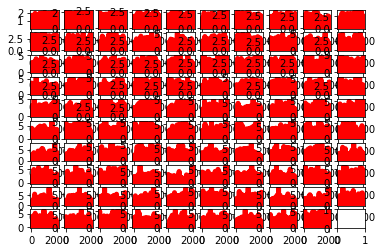

In [16]:
import matplotlib.pyplot as plt
loss_list=[]
a1_list=[]
a2_list=[]
p1_list=[]
p2_list=[]
r1_list=[]
r2_list=[]
for epoch in range(EPOCH):
    x = []#用于存放横坐标
    t_loss = []#用于存放train_loss
    x0=-1
    for data in tqdm(train_data_loader):
        # print(data)
        x0=x0+1
        api_input, api_label = data
        
        # print(api_label)
        # print(api_input)

        api_input = api_input.to(DEVICE)
        api_label = api_label.to(DEVICE).to(dtype=torch.long)
        rna_input = api_input[:,0:340]
        protein_input = api_input[:,340:640]
        rna_input = torch.unsqueeze(rna_input,dim=0)
        protein_input = torch.unsqueeze(protein_input,dim=0)
        # print(protein_input)
        # api_label = torch.unsqueeze(api_label,dim=0)
        # api_input= torch.unsqueeze(api_input,dim=0)
        # api_input = api_input.to(dtype=torch.float32)
        rna_input = rna_input.to(dtype=torch.float32)
        protein_input = protein_input.to(dtype=torch.float32)
        # output = Net(rna_input,protein_input)
        output = Net(rna_input,protein_input)
        # print(output.shape)
        # print(api_label.shape)
        # print(output)
        # print(api_label)
        optimizer.zero_grad()    
        Loss = loss_fn(output, api_label)  
        x.append(x0)
        
        # t_loss.append(Loss.detach().numpy())   
        t_loss.append(Loss.item())  
        Loss.backward()  

        optimizer.step() 
    train_loss_lines = plt.plot(x, t_loss, 'r', lw=5)
    loss_list.append(t_loss)
    plt.subplot(10,10,epoch+1)
    save_path = SAVE_MODEL_PATH+f'twoinput_batch1_Epoch={epoch}_lr={lr}.pth'
    torch.save(Net, save_path)
    a1,p1,r1=evaluate(SAVE_MODEL_PATH+f'twoinput_batch1_Epoch={epoch}_lr={lr}.pth',train_data_loader)
    a2,p2,r2=evaluate(SAVE_MODEL_PATH+f'twoinput_batch1_Epoch={epoch}_lr={lr}.pth',test_data_loader)
    a1_list.append(a1)
    a2_list.append(a2)
    p1_list.append(p1)
    p2_list.append(p2)
    r1_list.append(r1)
    r2_list.append(r2)
torch.save(Net, SAVE_MODEL_PATH+f'twoinput_batch1_Epoch={epoch}_lr={lr}_final.pth')

In [21]:

np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/loss_list.txt',loss_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/train_acc_list.txt',a1_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/train_pre_list.txt',p1_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/train_rec_list.txt',r1_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/test_acc_list.txt',a2_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/test_pre_list.txt',p2_list)
np.savetxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/test_rec_list.txt',r2_list)


In [18]:
import numpy as np
c = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/train_acc_list.txt')
d = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/test_acc_list.txt')
pp1 = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/train_pre_list.txt')
pp2 = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/test_pre_list.txt')
rr1 = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/train_rec_list.txt')
rr2 = np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/test_rec_list.txt')
l=np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/loss_list.txt')
l2=np.loadtxt('Z:/mlpcnnsemi/model/cnn/64/cnnoneiputbatch1lr0.0001/loss_list.txt')
print(c.shape)
print(max(c))
print(max(d))
print(max(pp1))
print(max(pp2))
print(max(rr1))
print(max(rr2))

(100,)
0.8632697947214076
0.8713450292397661
0.8571428571428571
0.9111111111111111
0.6129032258064516
0.5872093023255814


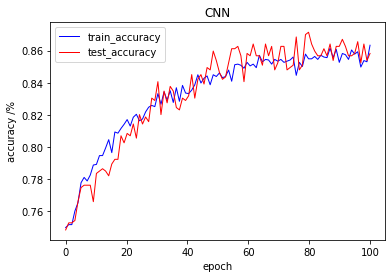

In [11]:
import matplotlib.pyplot as plt
x=np.linspace(0,100,100)

experiment = plt.plot(x, c, 'b', lw=1,label="train_accuracy")
experiment2 = plt.plot(x, d, 'r', lw=1,label="test_accuracy")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("accuracy /%")
plt.title('CNN')
plt.legend(loc=0)
plt.savefig("fig5-1.pdf")

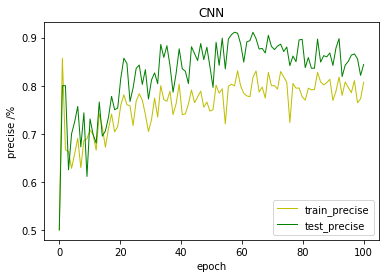

In [15]:
# 
x=np.linspace(0,100,100)

experiment = plt.plot(x, pp1, 'y', lw=1,label="train_precise")
experiment2 = plt.plot(x, pp2, 'g', lw=1,label="test_precise")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("precise /%")
plt.title('CNN')
plt.legend(loc=0)
plt.savefig("fig5-2.pdf")

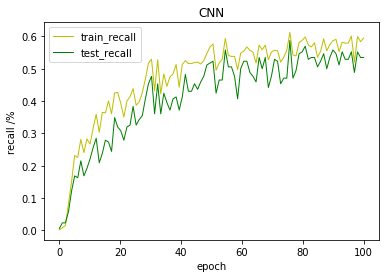

In [16]:
# recall
x=np.linspace(0,100,100)

experiment = plt.plot(x, rr1, 'y', lw=1,label="train_recall")
experiment2 = plt.plot(x, rr2, 'g', lw=1,label="test_recall")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("recall /%")
plt.title('CNN')
plt.legend(loc=0)
plt.savefig("fig5-3.pdf")

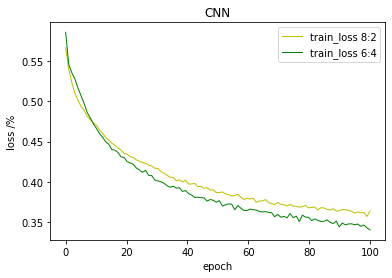

In [19]:
loss_avg=[]
loss_avg2=[]
for i in range(100):
    loss_avg.append(l[i].mean())
    loss_avg2.append(l2[i].mean())
x=np.linspace(0,100,100)

experiment = plt.plot(x, loss_avg, 'y', lw=1,label="train_loss 8:2")
experiment2 = plt.plot(x, loss_avg2, 'g', lw=1,label="train_loss 6:4")

plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("loss /%")
plt.title('CNN')
plt.legend(loc=0)
plt.savefig("fig5-4.pdf")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# l=np.loadtxt('Z:/mlpcnnsemi/model/cnn/82/cnnoneiputbatch1lr0.0001/loss_list.txt')
l2=np.loadtxt('Z:/mlpcnnsemi/model/cnn/64/cnntwoiputbatch1lr0.0001/loss_list.txt')
loss_avg=[]
loss_avg2=[]
for i in range(100):
    # loss_avg.append(l[i].mean())
    loss_avg2.append(l2[i].mean())
x=np.linspace(0,100,100)

# experiment = plt.plot(x, loss_avg, 'y', lw=1,label="train_loss 8:2")
experiment2 = plt.plot(x, loss_avg2, 'g', lw=1,label="train_loss 6:4")

plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("loss /%")
plt.title('CNN')
plt.legend(loc=0)
plt.savefig("fig6loss.pdf")
# x=np.linspace(0,2724,2724)
# plt.figure(figsize=(5, 4))
# for i in range (5):
#     plt.subplot(2,3,i+1)
    
#     experiment = plt.plot(x, l[i*20], 'r', lw=2)

#     plt.xlabel("samples") #设置X轴的文字
#     plt.ylabel("loss /%")
#     plt.title('CNN_'+'epoch_'+str(i*20))

# plt.subplot(2,3,6)

# experiment = plt.plot(x, l[99], 'r', lw=2)

# plt.xlabel("samples") #设置X轴的文字
# plt.ylabel("loss /%")
# plt.title('CNN_'+'epoch_'+'99')

# plt.tight_layout(h_pad=2)

In [ ]:
#double input
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, lrate = 0.001, loss_fn = nn.CrossEntropyLoss()):
        super(NeuralNet, self).__init__()


        self.conv1 = nn.Sequential(nn.Conv1d(1,8,kernel_size=1),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv2 = nn.Sequential(nn.Conv1d(8,16,kernel_size=1),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )
        self.conv3 = nn.Sequential(nn.Conv1d(1,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv4 = nn.Sequential(nn.Conv1d(8,16,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )

        self.conv5 = nn.Sequential(nn.Conv1d(16,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )
        self.conv6 = nn.Sequential(nn.Conv1d(8,1,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(1),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )

        self.conv7 = nn.Linear(25,10)
        self.conv8 = nn.Linear(10,2)

        # self.conv1=nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True)
        # self.batchnorm=nn.BatchNorm1d(num_features=1),
        # self.Relu=nn.ReLU()
        # self.pool=nn.MaxPool1d(kernel_size=3)
        # self.fc1=nn.Linear(64*4*4, 64)
        # self.dropout=nn.Dropout()
        # self.fc2 = nn.Linear(64, 10)

        self.loss_fn = loss_fn
        self.lrate=lrate        
        self.optimizer=optim.SGD(self.parameters(),self.lrate,momentum=0.9)
    def forward(self, rna, protein):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_size) Tensor
        @return y: an (N, out_size) Tensor of output from the network
        """
        '''
        extractor for protein 
        '''
        
        rna = self.conv1(rna)
        rna = self.conv2(rna)

        protein = self.conv3(protein)
        
        protein = self.conv4(protein)

        x = torch.cat((rna,protein),dim=2)
        x = self.conv5(x)
        x = self.conv6(x)
        # print(x.shape)
        x = self.conv7(x)
        x = self.conv8(x)
        x = torch.squeeze(x,dim=0)
        return x

In [20]:
def evaluate(model_path,test_data_loader,device=DEVICE):
    count=0
    acc = 0
    model = torch.load(model_path)
    for idx, data in enumerate(test_data_loader):
        api_input, api_label = data
        count+=1
        rna_input = api_input[:,1:341]
        protein_input = api_input[:,341:641]
        rna_input = torch.unsqueeze(rna_input,dim=0)
        protein_input = torch.unsqueeze(protein_input,dim=0)
        #api_label = torch.unsqueeze(api_label,dim=0)
        rna_input = rna_input.to(dtype=torch.float32).to(DEVICE)
        protein_input = protein_input.to(dtype=torch.float32).to(DEVICE)
        output = model(rna_input,protein_input).to(DEVICE)
        if(torch.argmax(output)==api_label[0]):
            acc+=1

    
    print(acc/count)

100%|██████████| 3404/3404 [00:19<00:00, 172.29it/s]


0.749412455934195


100%|██████████| 3404/3404 [00:25<00:00, 133.64it/s]


0.7071092831962397


100%|██████████| 3404/3404 [00:23<00:00, 145.42it/s]


0.6762632197414806


100%|██████████| 3404/3404 [00:23<00:00, 141.89it/s]


0.6891891891891891


100%|██████████| 3404/3404 [00:23<00:00, 143.68it/s]


0.6527614571092832
CSX


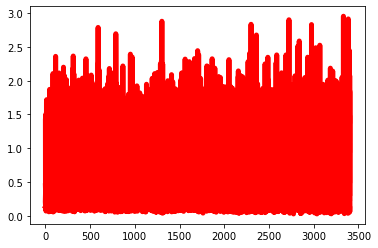

In [28]:
#double input
import matplotlib.pyplot as plt
for epoch in range(EPOCH):
    x = []#用于存放横坐标
    t_loss = []#用于存放train_loss
    x0=-1
    for data in tqdm(train_data_loader):
        x0=x0+1
        api_input, api_label = data
        
        # print(api_label)
        # print(api_input.shape)

        api_input = api_input.to(DEVICE)
        api_label = api_label.to(DEVICE).to(dtype=torch.long)
        rna_input = api_input[:,0:340]
        protein_input = api_input[:,340:640]
        rna_input = torch.unsqueeze(rna_input,dim=0)
        protein_input = torch.unsqueeze(protein_input,dim=0)
        # print(protein_input)
        # api_label = torch.unsqueeze(api_label,dim=0)
        
        rna_input = rna_input.to(dtype=torch.float32)
        protein_input = protein_input.to(dtype=torch.float32)
        output = Net(rna_input,protein_input)

        # print(output.shape)
        # print(api_label.shape)
        # print(output)
        # print(api_label)
        optimizer.zero_grad()    
        Loss = loss_fn(output, api_label)  
        x.append(x0)
        t_loss.append(Loss.detach().numpy())        
        Loss.backward()  

        optimizer.step() 
    train_loss_lines = plt.plot(x, t_loss, 'r', lw=5)
    save_path = SAVE_MODEL_PATH+f'twoinput_Epoch={epoch}_lr={lr}.pth'
    torch.save(Net, save_path)
    evaluate(SAVE_MODEL_PATH+f'twoinput_Epoch={epoch}_lr={lr}.pth',test_data_loader)
    
torch.save(Net, SAVE_MODEL_PATH+f'twoinput_Epoch={epoch}_lr={lr}_final.pth')
print('CSX')